In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
from pathlib import Path
from math import trunc
%matplotlib inline

In [2]:
# Retreive all the data from the meta-data file
meta_data = ascii.read('../datared/J0600_meta-data.txt')
epoch_tmp = np.array(meta_data["EPOCH"])
sort = np.argsort(epoch_tmp)
epoch = epoch_tmp

filters = np.array(meta_data["FILTER"])
airmass = np.array(meta_data["AIRMASS"])

fits_name = np.array(meta_data["IMAGE"])
files = np.array(meta_data["NEWIMG"])

N_files = len(epoch) #nr of files
N_stars = len(ascii.read(files[0])["STARNR"])
print ("Number of files = {}".format(N_files))
print ("Number of stars = {}".format(N_stars))

Number of files = 45
Number of stars = 44


In [3]:
# Retreive the flux and fluxerr data from all the other files
flux_tmp = np.zeros((N_files,N_stars))
fluxerr_tmp = np.zeros((N_files,N_stars))

for i in range(N_files):
    file = files[i]
    
    filecontent = ascii.read(file)
    flux_tmp[i] = filecontent["FLUX"]
    fluxerr_tmp[i] = filecontent["FLUXERR"]

flux = flux_tmp
fluxerr = fluxerr_tmp

In [19]:
# Make a mask for all the filters:
dif_f = []
for f in filters:
    if f not in dif_f:
        dif_f.append(f)
print (dif_f)
print (filters[sort])

filter_msk = []
for i in range(len(dif_f)):
    filter_msk.append(filters == dif_f[i])
filter_msk = np.array(filter_msk)
print (filter_msk)

['rp', 'ip', 'gp']
['gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip'
 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp'
 'ip' 'rp' 'gp' 'ip' 'rp' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip' 'rp' 'gp' 'ip'
 'rp' 'gp' 'ip']
[[ True False False  True False  True  True False False False  True False
   True False False False False False False False False False False False
   True  True False False False  True False False  True False  True False
  False  True False False False  True  True  True False]
 [False  True  True False  True False False  True  True False False  True
  False  True False False  True False  True False  True False  True False
  False False False False False False False  True False  True False False
   True False False  True False False False False False]
 [False False False False False False False False False  True False False
  False False  True  True False  True False  True False  True False  True
  False False  True  True  True False  True F

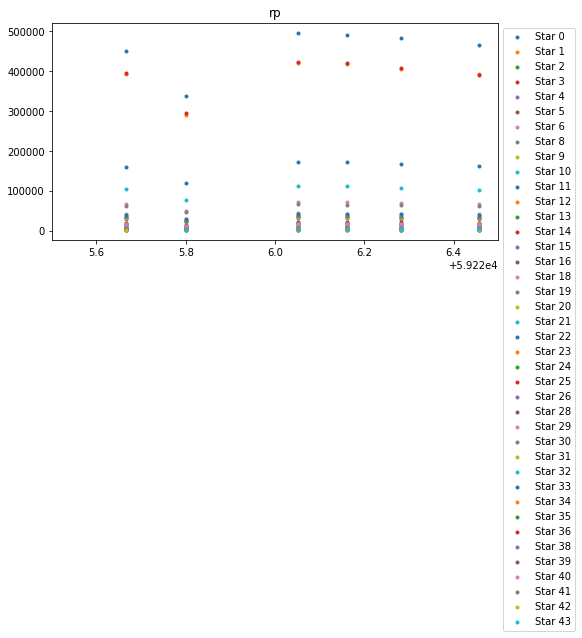

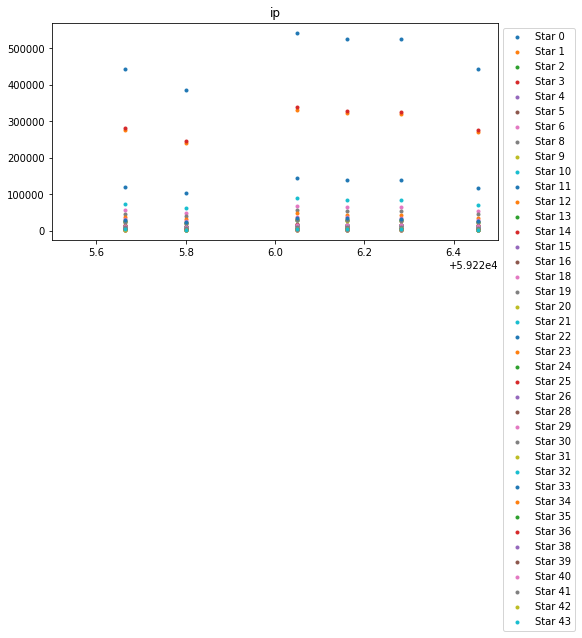

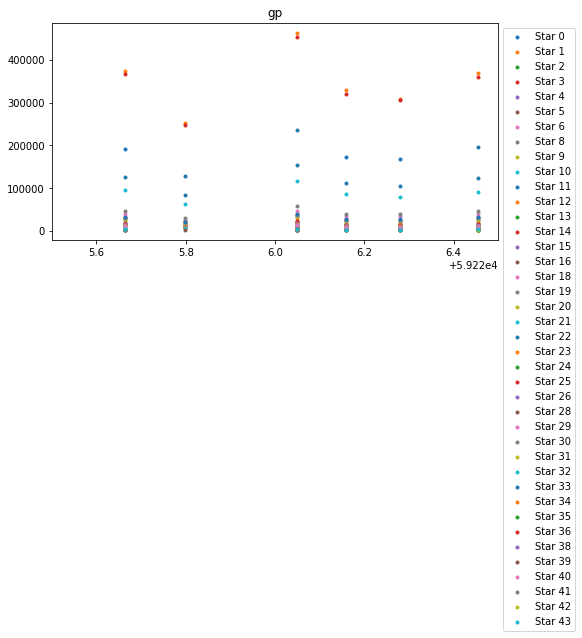

In [28]:
for i in range(len(dif_f)):
    plt.figure(figsize=(8,4))
    for j in range(0,N_stars):
        if (j+3)%10 !=0:
            plt.scatter(epoch[filter_msk[i]],flux[filter_msk[i]][:,j],marker='.', label="Star "+str(j))
    plt.title(dif_f[i])
    #plt.axis(xmin=59225.5,xmax=59235)
    plt.axis(xmin=59225.5, xmax=59226.5)#59226.2804254
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

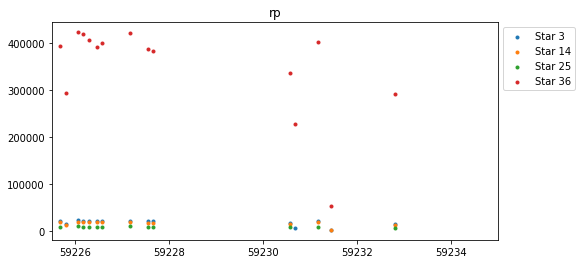

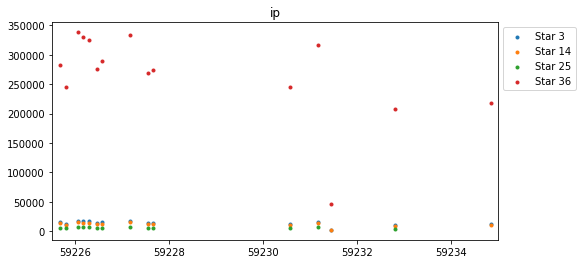

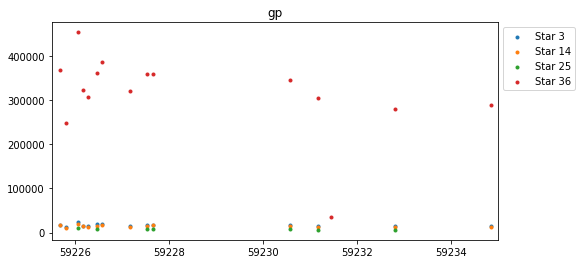

[59227.5364842 59231.4324753 59226.1609917 59232.8002971 59226.0504379
 59225.8003965 59227.6577972 59226.4562817 59226.5746507 59225.6650903
 59231.1580695 59227.1649187 59230.5676544 59230.6754196 59226.2818588]


In [30]:
for i in range(len(dif_f)):
    plt.figure(figsize=(8,4))
    for j in [3,14,25,36]:
        plt.scatter(epoch[filter_msk[i]],flux[filter_msk[i]][:,j],marker='.', label="Star "+str(j))
    plt.title(dif_f[i])
    plt.axis(xmin=59225.5,xmax=59235)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

tmp = epoch[filter_msk[0]]
print (tmp)

11


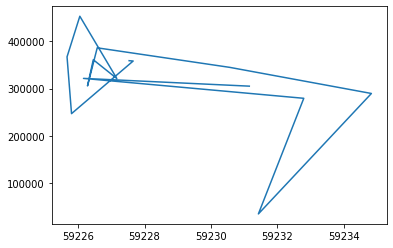

[1.67925571e+05 2.07203766e+04 1.48442262e+04 1.56029000e+04
            nan            nan 8.02340657e+03 2.94804283e+04
 1.13783781e+04 8.03991703e+03 2.31089874e+04 4.74824086e+03
 3.08089297e+05 3.22972286e+03 1.29455632e+04 1.25389734e+04
            nan 6.57359885e+03 3.39099831e+04 3.93979034e+04
 2.23148100e+04 7.86897361e+04 1.05102353e+05 1.17324601e+04
 2.22508237e+03            nan            nan 7.32301313e+03
 2.36431950e+03 2.65158749e+04 2.47044526e+04 1.86958786e+03
 9.14349471e+03 2.74038053e+04            nan            nan
 3.05533725e+05 2.76640897e+06 2.51381362e+03 3.92934077e+03
 9.44822277e+03 2.13648388e+03            nan 2.97178738e+03]
File according to sorting tool: 59226.2804254gp
The actual file is 59231.43101_gp


In [7]:
print (np.argmin(flux[filter_msk[2]][:,36]))

plt.plot(epoch[filter_msk[2]], flux[filter_msk[2]][:,36])
plt.show()

print (flux[filter_msk[2]][7])
#print (fits_name[filter_msk[2]][7])
#print (files[filter_msk[2]][7])

print ("File according to sorting tool: " + str(epoch[filter_msk[2]][7])+str(dif_f[2]))
print("The actual file is 59231.43101_gp")

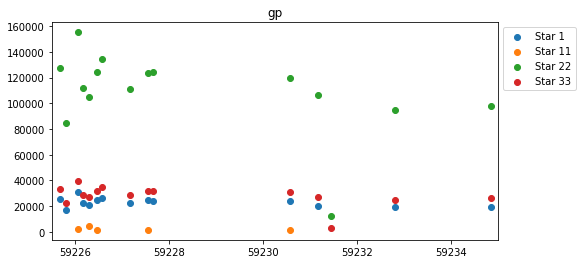

11
[1.67925571e+05 2.07203766e+04 1.48442262e+04 1.56029000e+04
            nan            nan 8.02340657e+03 2.94804283e+04
 1.13783781e+04 8.03991703e+03 2.31089874e+04 4.74824086e+03
 3.08089297e+05 3.22972286e+03 1.29455632e+04 1.25389734e+04
            nan 6.57359885e+03 3.39099831e+04 3.93979034e+04
 2.23148100e+04 7.86897361e+04 1.05102353e+05 1.17324601e+04
 2.22508237e+03            nan            nan 7.32301313e+03
 2.36431950e+03 2.65158749e+04 2.47044526e+04 1.86958786e+03
 9.14349471e+03 2.74038053e+04            nan            nan
 3.05533725e+05 2.76640897e+06 2.51381362e+03 3.92934077e+03
 9.44822277e+03 2.13648388e+03            nan 2.97178738e+03]
File according to sorting tool: 59226.2804254gp
The actual file is 59231.43101_gp


In [8]:
for i in [2]:
    plt.figure(figsize=(8,4))
    for j in [1,11,22,33]:
        plt.scatter(epoch_tmp[filter_msk[i]],flux[filter_msk[i]][:,j], label="Star "+str(j))
    plt.title(dif_f[i])
    plt.axis(xmin=59225.5,xmax=59235)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

print (np.argmin(flux[filter_msk[2]][:,22]))

#plt.plot(epoch[filter_msk[2]], flux[filter_msk[2]][:,22])
plt.show()

print (flux[filter_msk[2]][7])
#print (fits_name[filter_msk[2]][7])
#print (files[filter_msk[2]][7])

print ("File according to sorting tool: " + str(epoch[filter_msk[2]][7])+str(dif_f[2]))
print("The actual file is 59231.43101_gp")